In [142]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


#### Objectif : 
Prédire avec précision le futur cours de cloture ajusté de l'ETF sur l'or sur une periode donnée dans le futur

## Analyse exploratoire


In [32]:
df = pd.read_csv("FINAL_USO.csv", index_col='Date', parse_dates=True)

In [33]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   
...              ...         ...         ...         ...         ...  ...   
2018-12-24   9736400  239.039993  240.839996  234.270004  234.339996  ...   
2018-12-26  14293500  235.970001  246.179993  233.759995  246.179993  ...   
2018-12-27  11874400  242.570007  248.289993  238.960007  248.070007  ...   
2018-12-28   6864700  249.580002  251.399994  246.449997  247.750000  ...   
2018-12-31   8449400  249.559998  250.190002  247.470001  249.919998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   
...               ...        ...            ...         ...        ...   
2018-12-24  20.650000  21.090000      21.090000    60507000   9.490000   
2018-12-26  20.530001  20.620001      20.620001    76365200   9.250000   
2018-12-27  20.700001  20.969999      20.969999    52393000   9.590000   
2018-12-28  20.570000  20.600000      20.600000    49835000   9.540000   
2018-12-31  20.559999  21.090000      21.090000    53866600   9.630000   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  
...               ...        ...        ...            ...         ...  
2018-12-24   9.520000   9.280000   9.290000       9.290000    21598200  
2018-12-26   9.920000   9.230000   9.900000       9.900000    40978800  
2018-12-27   9.650000   9.370000   9.620000       9.620000    36578700  
2018-12-28   9.650000   9.380000   9.530000       9.530000    22803400  
2018-12-31   9.710000   9.440000   9.660000       9.660000    28417400  

[1718 rows x 80 columns]

### Description des variables 

#### Date:
Date du jour de trading
#### Open
prix de l'action à l'ouverture 
#### High
prix le plus élevé de l'action atteint dans la journée 
#### Low
prix le plus bas de l'action atteint dans la journée 
#### Close
prix de l'action de cloture de la journée
#### Adj close
prix de cloture ajusté(il génère la valeur réelle de l'action de la société
#### Volume
Nombre d'action négocié

### Type de variables

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

In [35]:
df.index

DatetimeIndex(['2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27',
               '2011-12-28', '2011-12-29',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1718, freq=None)

### Valeur manquante 

In [36]:
df.isnull().any()

Open             False
High             False
Low              False
Close            False
Adj Close        False
                 ...  
USO_High         False
USO_Low          False
USO_Close        False
USO_Adj Close    False
USO_Volume       False
Length: 80, dtype: bool

la fonction isnull nous montres qu'il n'ya pas de valeur manquante

### valeurs aberrantes

In [184]:
# for i in df:
#     fig = px.box(df[i], y= i)
#     fig.show()

Ces boxplots nous indiques qu'il existe des valeurs abérrantes au niveau des variables Open, High,low,,Close,Adj close, Volume, Sp_volume, DJ_volume, EG_open, EG_high, EG_low,EG_close, EG_Ajclose, EG_volume, OF_Volume, SP_Price, SF_Open, SF_High, SF_Low, SF_Volume, PLD_Price, PLD_Open, PLD_High, PLD_Low,RHO_PRICE, USDI_Volume, GDX_Volume, GDX_High, GDX_Low,GDX_Close, GDX_Adj Close, GDX_Volume et USO_Volume.
Ces variables seront traitées plustard.

### modifions le dataset en fonction des indices et actions

In [73]:
df = df.copy()

In [74]:
#divisons le dataframe en fonction des indices et actions
df_or=df[['Open', 'High','Low', 'Close', 'Adj Close', 'Volume']]
df_sp=df[['SP_open','SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' ]]
df_dj=df[['DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume']]
df_eg=df[['EG_open','EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume']]
df_eur=df[['EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend']]
df_of=df[['OF_Price', 'OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend']]
df_os=df[['OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend']]
df_sf=df[['SF_Price', 'SF_Open', 'SF_High','SF_Low', 'SF_Volume', 'SF_Trend']]
df_usb=df[['USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend']]
df_plt=df[['PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend']]
df_pld=df[['PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend','RHO_PRICE']]
df_usdi=df[['USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend']]
df_gdx=df[['GDX_Open', 'GDX_High','GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume']]
df_uso=df[['USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']]

In [75]:
#ajoutons les symboles de chaque indice au dataframe
df_or = df_or.assign(symbole='OR')
df_sp = df_sp.assign(symbole='SP')
df_dj = df_dj.assign(symbole='DJ')
df_eg = df_eg.assign(symbole='EG')
df_eur = df_eur.assign(symbole='EU')
df_of = df_of.assign(symbole='OF')
df_os = df_os.assign(symbole='OS')
df_sf = df_sf.assign(symbole='SF')
df_usb = df_usb.assign(symbole='USB')
df_plt = df_plt.assign(symbole='PLT')
df_pld = df_pld.assign(symbole='PLD')
df_usdi = df_usdi.assign(symbole='USDI')
df_gdx = df_gdx.assign(symbole='GDX')
df_uso = df_uso.assign(symbole='USO')


In [76]:
#renommer les colonnes du dataset
df_sp = df_sp.rename(columns ={'SP_open':'Open','SP_high':'High', 'SP_low':'Low', 'SP_close':'Close', 'SP_Ajclose':'Adj Close', 'SP_volume':'Volume'})
df_dj = df_dj.rename(columns ={'DJ_open':'Open','DJ_high':'High', 'DJ_low':'Low', 'DJ_close':'Close', 'DJ_Ajclose':'Adj Close', 'DJ_volume':'Volume'})
df_eg = df_eg.rename(columns ={'EG_open':'Open','EG_high':'High', 'EG_low':'Low', 'EG_close':'Close', 'EG_Ajclose':'Adj Close', 'EG_volume':'Volume'})
df_eur = df_eur.rename(columns ={'EU_Price': 'Price','EU_open':'Open','EU_high':'High', 'EU_low':'Low', 'EU_Trend': 'Trend'})
df_of = df_of.rename(columns ={'OF_Price':'Price', 'OF_open':'Open','OF_high':'High', 'OF_low':'Low', 'OF_volume':'Volume', 'OF_Trend':'Trend'})
df_os = df_os.rename(columns ={'OS_Price':'Price','OS_open':'Open','OS_high':'High', 'OS_low':'Low', 'OS_Trend':'Trend'})
df_sf = df_sf.rename(columns ={'SF_Price': 'Price','SF_open':'Open','SF_high':'High', 'SF_low':'Low','SF_Volume': 'Volume', 'SF_Trend':'Trend'})
df_usb = df_usb.rename(columns ={'USB_Price':'Price','USB_open':'Open','USB_high':'High', 'USB_low':'Low', 'USB_Trend':'Trend'})
df_plt = df_plt.rename(columns ={'PLT_Price': 'Price','PLT_open':'Open','PLT_high':'High', 'PLT_low':'Low', 'PLT_Trend':'Trend'})
df_pld = df_pld.rename(columns ={'PLD_Price': 'Price','PLD_open':'Open','PLD_high':'High', 'PLD_low':'Low', 'PLD_Trend':'Trend', 'RHO_PRICE': 'PRICE'})
df_usdi = df_usdi.rename(columns ={'USDI_Price':'Price','USDI_Open':'Open','USDI_High':'High', 'USDI_Low':'Low', 'USDI_Volume':'Volume', 'USDI_Trend': 'Trend'})
df_gdx = df_gdx.rename(columns ={'GDX_Open':'Open','GDX_High':'High', 'GDX_Low':'Low', 'GDX_Close':'Close', 'GDX_Adj Close':'Adj Close', 'GDX_Volume':'Volume'})
df_uso = df_uso.rename(columns ={'USO_Open':'Open','USO_High':'High', 'USO_Low':'Low', 'USO_Close':'Close', 'USO_Adj Close':'Adj Close', 'USO_Volume':'Volume'})

In [77]:
liste1 = [df_or,df_sp,df_dj,df_eg,df_gdx,df_uso]
liste2 = [df_eur,df_of,df_os,df_sf,df_usb,df_plt,df_pld,df_usdi]

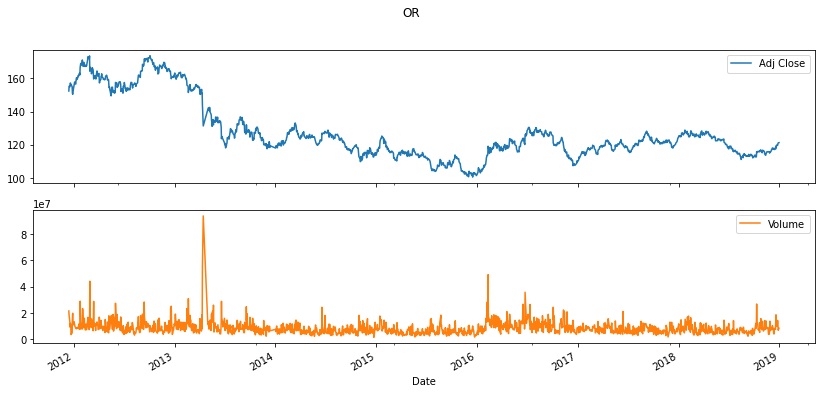

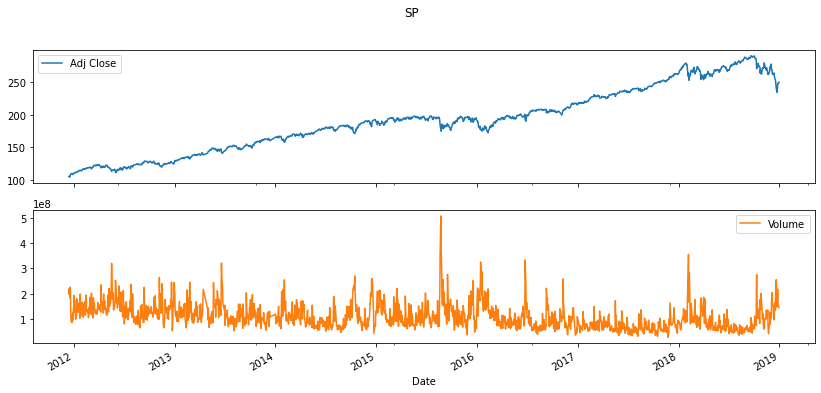

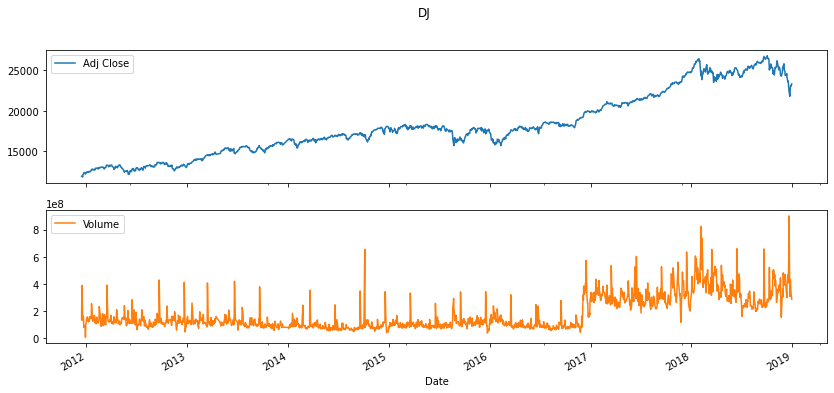

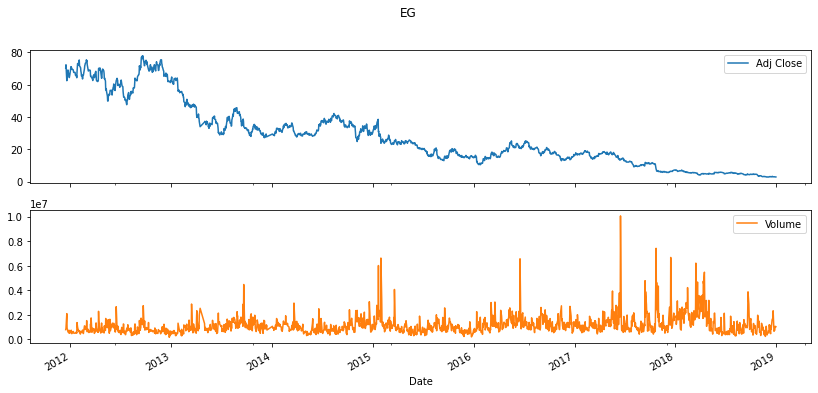

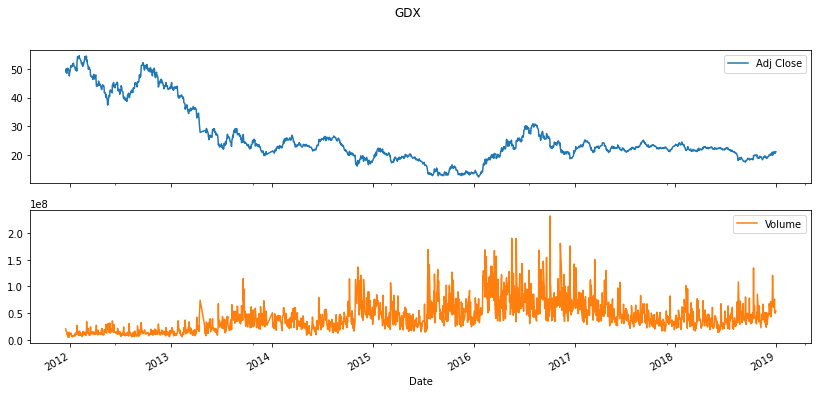

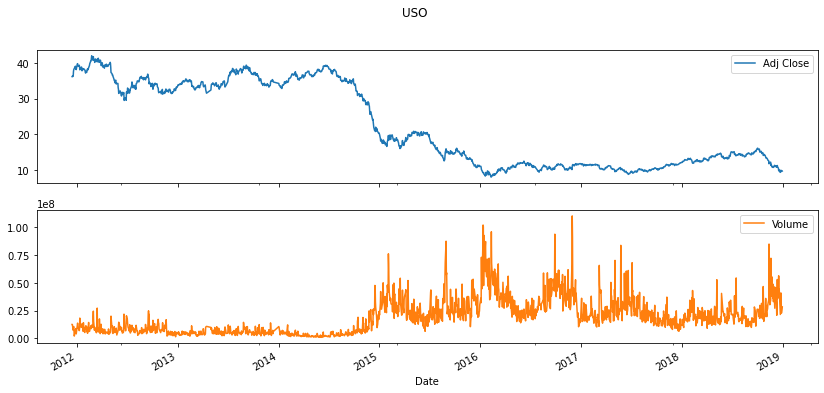

In [79]:
#evolution du prix et du volume de chaque indices
for i in range(0, len(liste1)): 
    liste1[i][['Adj Close', 'Volume']].plot(subplots = True, title = liste1[i]["symbole"].unique()[0], figsize = (14,6))
    plt.show

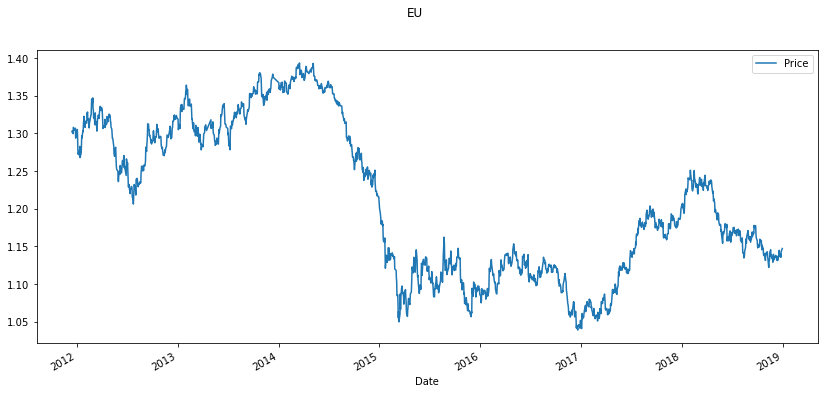

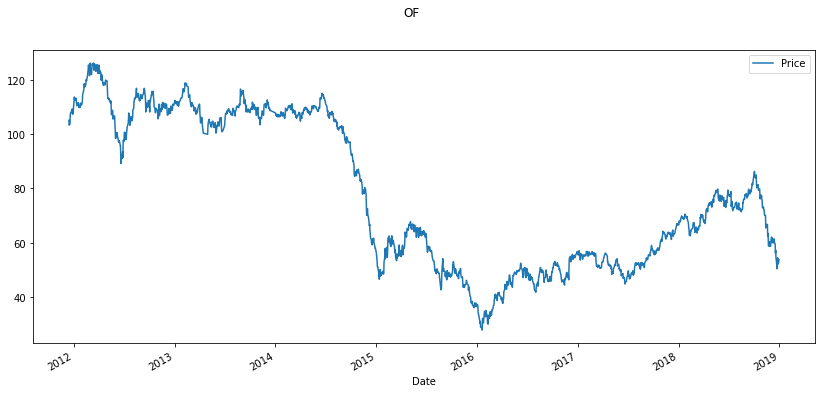

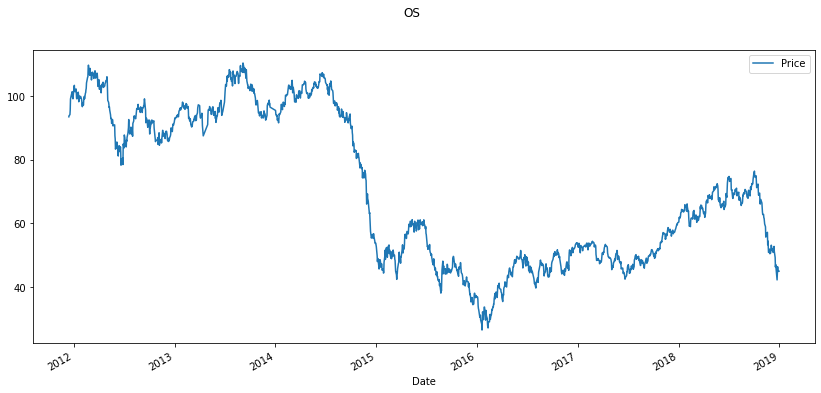

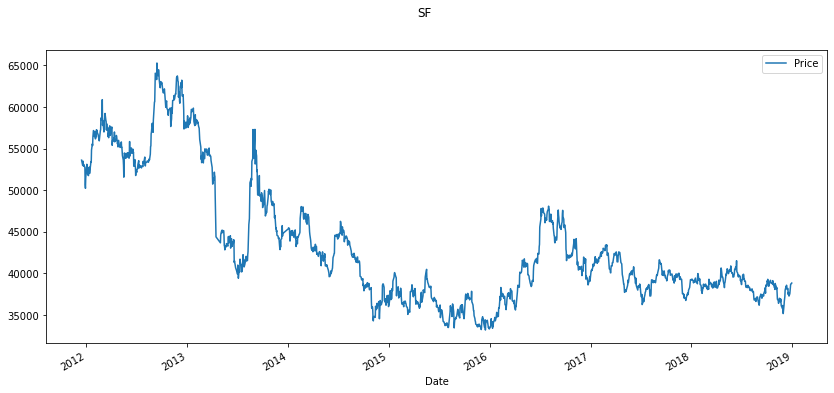

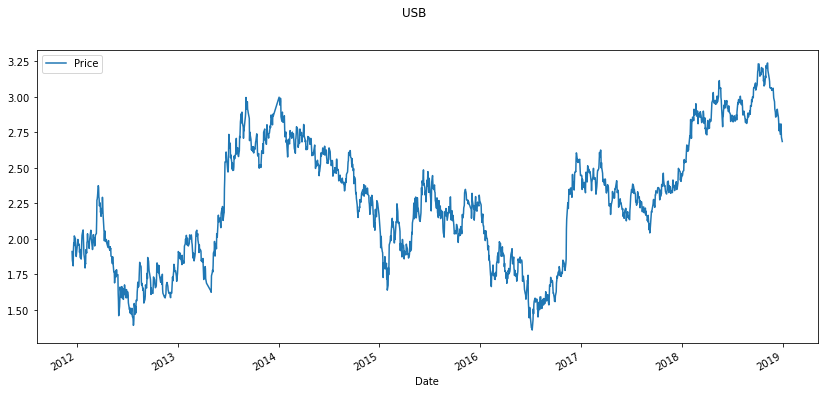

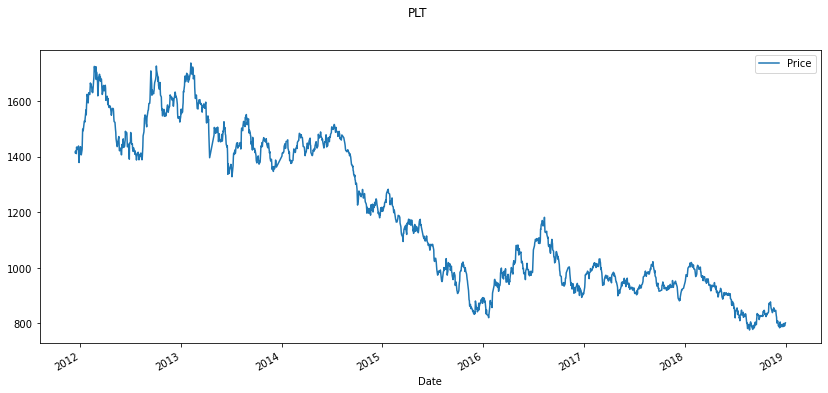

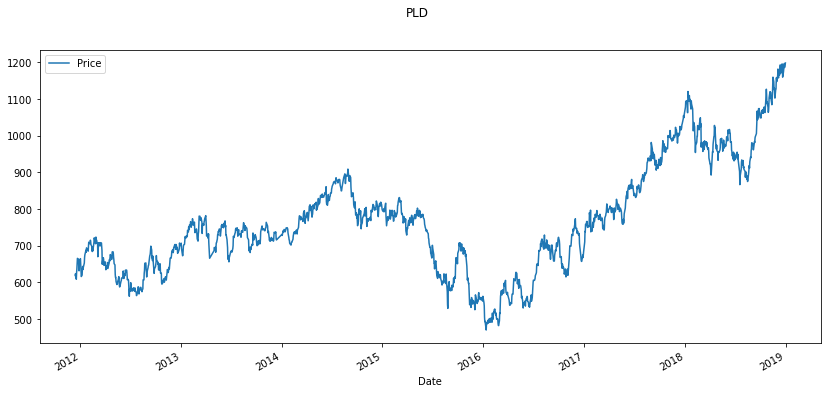

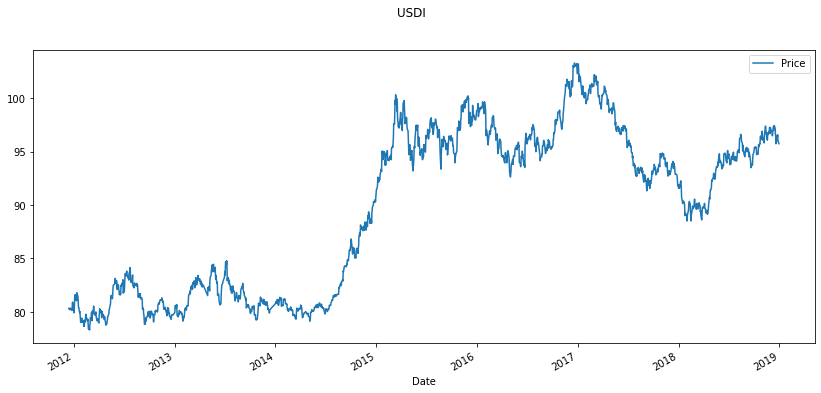

In [80]:
#evolution du prix des autres indices sans adjclose
for i in range(0, len(liste2)): 
    liste2[i][['Price']].plot(subplots = True, title = liste2[i]["symbole"].unique()[0], figsize = (14,6))
    plt.show

pour chaque indice nous avons l'evolution du prix et l'evolution du volume

In [92]:
#etant donné que nous voulons predire la variable Adj close , donc créons un data qui regroupe tout les indices ayant Adjclose 
data = liste1[0]
for i in range(1, len(liste1)):
    data = pd.concat([data, liste1[i]])
data    


Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24    9.490000    9.520000    9.280000    9.290000    9.290000   
2018-12-26    9.250000    9.920000    9.230000    9.900000    9.900000   
2018-12-27    9.590000    9.650000    9.370000    9.620000    9.620000   
2018-12-28    9.540000    9.650000    9.380000    9.530000    9.530000   
2018-12-31    9.630000    9.710000    9.440000    9.660000    9.660000   

              Volume symbole  
Date                          
2011-12-15  21521900      OR  
2011-12-16  18124300      OR  
2011-12-19  12547200      OR  
2011-12-20   9136300      OR  
2011-12-21  11996100      OR  
...              ...     ...  
2018-12-24  21598200     USO  
2018-12-26  40978800     USO  
2018-12-27  36578700     USO  
2018-12-28  22803400     USO  
2018-12-31  28417400     USO  

[10308 rows x 7 columns]

### Visualisation de la target

In [93]:
data = data.copy()

In [148]:
data[['Adj Close']]

Adj Close
Date                  
2011-12-15  152.330002
2011-12-16  155.229996
2011-12-19  154.869995
2011-12-20  156.979996
2011-12-21  157.160004
...                ...
2018-12-24    9.290000
2018-12-26    9.900000
2018-12-27    9.620000
2018-12-28    9.530000
2018-12-31    9.660000

[10308 rows x 1 columns]

In [186]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x = df.index,
#                                 y = df['Adj Close'],
#                                 mode = 'lines',
#                                 name = 'prix de cloture ajusté' ,
#                                 ))
# fig.update_layout(title = 'Evolution du prix de cloture ajusté du GOLG ETF')
# fig.update_xaxes(rangeslider_visible=True)
# fig.show()

In [96]:
#creons une fonction pour les données des prix
def variable(data, variable_name):
    dat = data.reset_index()
    dat.set_index(['Date', 'symbole'], inplace = True)
    dat = dat[variable_name].unstack() #je vais les mettre en colonne
    dat_new_index = pd.date_range(dat.index.min(), dat.index.max(),freq='D') #rearrangement des dates pour avoir des dates regulieres
    dat.reindex(dat_new_index) #je defini mes nouveaux index de ligne
    dat.fillna(0, inplace = True) #pour eviter les valeurs manquantes
    return dat

In [105]:
#resumé statistique des prix et des volumes
print("Resumé statistique des prix")
display(prix_adjclose.describe())
print("Resumé statistique des volumes")
display(prix_volume.describe())

Resumé statistique des prix


symbole            DJ           EG          GDX           OR           SP  \
count     1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean     18164.119043    27.783958    25.924624   127.319482   192.204570   
std       3884.495887    19.721857     9.886570    17.536269    48.514161   
min      11766.259770     2.800000    12.269618   100.500000   104.468536   
25%      15495.665280    14.082418    20.180950   116.052502   153.027992   
50%      17612.939455    22.408089    22.677603   121.795002   191.658341   
75%      20851.157715    36.811500    26.478154   128.470001   228.721389   
max      26828.390630    77.999313    54.617039   173.610001   290.560242   

symbole          USO  
count    1718.000000  
mean       22.109051  
std        11.432787  
min         7.960000  
25%        11.392500  
50%        16.345000  
75%        34.417499  
max        42.009998

Resumé statistique des volumes


symbole            DJ            EG           GDX            OR            SP  \
count    1.718000e+03  1.718000e+03  1.718000e+03  1.718000e+03  1.718000e+03   
mean     1.779131e+08  1.136074e+06  4.356515e+07  8.446327e+06  1.098026e+08   
std      1.212753e+08  7.301289e+05  2.909151e+07  4.920731e+06  4.925110e+07   
min      8.410000e+06  1.645000e+05  4.729000e+06  1.501600e+06  2.785650e+07   
25%      9.232000e+07  7.006250e+05  2.259968e+07  5.412925e+06  7.387085e+07   
50%      1.206950e+08  9.688000e+05  3.730465e+07  7.483900e+06  9.972020e+07   
75%      2.636300e+08  1.344775e+06  5.697055e+07  1.020795e+07  1.351161e+08   
max      9.005100e+08  1.006120e+07  2.321536e+08  9.380420e+07  5.072443e+08   

symbole           USO  
count    1.718000e+03  
mean     1.922313e+07  
std      1.575743e+07  
min      1.035100e+06  
25%      6.229500e+06  
50%      1.613015e+07  
75%      2.672375e+07  
max      1.102657e+08

le resumé statistique des volumes nous permet de voir que l'indice Dow Jones est le plus negocié que les autres actions avec une moyenne de 1.779131e+08, vient ensuite l'indice S&P 500 avec une moyenne de 1.098026e+08.
le prix maximun de le l'indice Dow Jones est de 26828.390630$ ce qui est largement au dessus des autres

In [102]:
#uniquement les données sur les prix adjusté
prix_adjclose = variable(data, 'Adj Close')
prix_adjclose

symbole              DJ         EG        GDX          OR          SP  \
Date                                                                    
2011-12-15  11868.80957  70.431755  48.973877  152.330002  105.441238   
2011-12-16  11866.38965  72.364037  49.921513  155.229996  105.597549   
2011-12-19  11766.25977  62.509384  48.490578  154.869995  104.468536   
2011-12-20  12103.58008  64.731514  50.215282  156.979996  107.629784   
2011-12-21  12107.74023  66.180725  50.186852  157.160004  107.838242   
...                 ...        ...        ...         ...         ...   
2018-12-24  21792.19922   2.950000  21.090000  120.019997  234.339996   
2018-12-26  22878.44922   3.000000  20.620001  119.660004  246.179993   
2018-12-27  23138.82031   2.950000  20.969999  120.570000  248.070007   
2018-12-28  23062.40039   2.900000  20.600000  121.059998  247.750000   
2018-12-31  23327.46094   2.880000  21.090000  121.250000  249.919998   

symbole           USO  
Date                   
2011-12-15  36.130001  
2011-12-16  36.270000  
2011-12-19  36.200001  
2011-12-20  37.560001  
2011-12-21  38.110001  
...               ...  
2018-12-24   9.290000  
2018-12-26   9.900000  
2018-12-27   9.620000  
2018-12-28   9.530000  
2018-12-31   9.660000  

[1718 rows x 6 columns]

In [103]:
#uniquement les données sur les volumes
prix_volume = variable(data, 'Volume')
prix_volume

symbole            DJ       EG       GDX        OR         SP       USO
Date                                                                   
2011-12-15  136930000   787900  20605600  21521900  199109200  12616700
2011-12-16  389520000   896600  16285400  18124300  220481400  12578800
2011-12-19  135170000  2096700  15120200  12547200  183903000   7418200
2011-12-20  165180000   875300  11644900   9136300  225418100  10041600
2011-12-21  163250000   837600   8724300  11996100  194230900  10728000
...               ...      ...       ...       ...        ...       ...
2018-12-24  308420000   655100  60507000   9736400  147311600  21598200
2018-12-26  433080000   746300  76365200  14293500  218485400  40978800
2018-12-27  407940000   744000  52393000  11874400  186267300  36578700
2018-12-28  336510000  1061100  49835000   6864700  153100200  22803400
2018-12-31  288830000  1031800  53866600   8449400  144299400  28417400

[1718 rows x 6 columns]

In [81]:
liste = [df_or,df_sp,df_dj,df_eg,df_eur,df_of,df_os,df_sf,df_usb,df_plt,df_pld,df_usdi,df_gdx,df_uso]

### Visualisation des prix et volumes

In [14]:
# def visualise(data):
#     fig = go.Figure()
#     for i in data.columns:
#         fig.add_trace(go.Scatter(x = df.index,
#                                 y = df[i],
#                                mode = 'lines',
#                                 name = i ,
#                                 ))
#         fig.show()

In [114]:
def visualises(data, title ):
    fig = px.line(title = title)
    for i in data.columns:
        fig.add_scatter(x=data.index, y=data[i], name=i)
        fig.update_xaxes(rangeslider_visible=True)
    fig.show()     

In [116]:
visualises(prix_volume, "Evolution du volume d'actions negociés ")

cette visualisation confirme que le Dow Jones est le plus negocié, ensuite le sp

In [117]:
visualises(prix_adjclose, "Evolution des prix des actions")

l'evolution des prix ne nous permet pas de faire une comparaison entre les indices dans la mésure ou les prix initiaux ne sont pas les memes. il faudrait donc faire une normalisation des données en divisant chaque valeur d'une serie par sa valeur initiale , ainsi tous les prix commencerons par 1 et on pourrais faire des comparaisons.

### normalisation des volumes et des prix

In [119]:
def normalise(data):
    x = data.copy()
    for i in x.columns:
        x[i] = x[i]/x[i][0]
    return x        

In [120]:
normalise(prix_adjclose)

symbole           DJ        EG       GDX        OR        SP       USO
Date                                                                  
2011-12-15  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2011-12-16  0.999796  1.027435  1.019350  1.019038  1.001482  1.003875
2011-12-19  0.991360  0.887517  0.990131  1.016674  0.990775  1.001937
2011-12-20  1.019780  0.919067  1.025348  1.030526  1.020756  1.039579
2011-12-21  1.020131  0.939643  1.024768  1.031707  1.022733  1.054802
...              ...       ...       ...       ...       ...       ...
2018-12-24  1.836090  0.041885  0.430638  0.787895  2.222470  0.257127
2018-12-26  1.927611  0.042594  0.421041  0.785531  2.334760  0.274011
2018-12-27  1.949549  0.041885  0.428187  0.791505  2.352685  0.266261
2018-12-28  1.943110  0.041175  0.420632  0.794722  2.349650  0.263770
2018-12-31  1.965442  0.040891  0.430638  0.795969  2.370230  0.267368

[1718 rows x 6 columns]

In [121]:
visualises(normalise(prix_adjclose), "Evolution des prix des actions")

Nous remarquons que le prix de cloture ajusté de l'indice du Dow Jones et du S&P 500 augmente lorsqu'on ajoute 1 dollar sur les action, cependant celui de l'Eldorado Gold Corporation, l'ETF Gold Miners, l'ETF pétrolier USO et du Gold ETF diminue. en effet le sp est un indice boursiers basé sur 500 grandes sociétés americaines et donc constitue l'indice de référence des bourses américaines ainsi que l'indice Dow Jones à 30 valeurs industrielles en Ameriques.

### Calculons le pourcentage de variation des prix de chaque actions(rendement sur toute la periode)

In [123]:
#rendement sur toute la periode(variation des prix sur toute la periode) 
for i in prix_adjclose.columns:
    r=((prix_adjclose[i][-1] - prix_adjclose[i][0])/ prix_adjclose[i][0])*100
    print(i,r, '%')  

DJ 96.54423472226964 %
EG -95.91093534443378 %
GDX -56.93622540849687 %
OR -20.40307332235183 %
SP 137.0230118125131 %
USO -73.2632169038689 %


etant donné que le rendement depend de la periode considérée, il doit etre analysé avec le risque(la variance indicateur du risque)

In [124]:
#mettre le rendement dans un dataframe
df_r = prix_adjclose.pct_change()
df_r

symbole           DJ        EG       GDX        OR        SP       USO
Date                                                                  
2011-12-15       NaN       NaN       NaN       NaN       NaN       NaN
2011-12-16 -0.000204  0.027435  0.019350  0.019038  0.001482  0.003875
2011-12-19 -0.008438 -0.136182 -0.028664 -0.002319 -0.010692 -0.001930
2011-12-20  0.028668  0.035549  0.035568  0.013624  0.030260  0.037569
2011-12-21  0.000344  0.022388 -0.000566  0.001147  0.001937  0.014643
...              ...       ...       ...       ...       ...       ...
2018-12-24 -0.029100 -0.016667  0.031800  0.010950 -0.026423 -0.029258
2018-12-26  0.049846  0.016949 -0.022285 -0.002999  0.050525  0.065662
2018-12-27  0.011381 -0.016667  0.016974  0.007605  0.007677 -0.028283
2018-12-28 -0.003303 -0.016949 -0.017644  0.004064 -0.001290 -0.009356
2018-12-31  0.011493 -0.006897  0.023786  0.001569  0.008759  0.013641

[1718 rows x 6 columns]

In [125]:
#supprimer la premiere colonne pour enlever les valeurs manquantes
df_r= df_r.dropna()

In [126]:
#visualiser les rendements journaliers
visualises(df_r, 'Rendements des indices')

on observe une sucession de rendement positif et negatif et qui tourne autour de 0(pas les memes fluctuactions et amplitudes).on remarque que le prix de l'ETF pétrolier USO est le plus volatile que celui des autres

### Corrélation entre les variables

In [127]:
#correlation entre les indices
df_r.corr()

symbole        DJ        EG       GDX        OR        SP       USO
symbole                                                            
DJ       1.000000  0.115445  0.102437 -0.051392  0.965358  0.341140
EG       0.115445  1.000000  0.741493  0.557368  0.144969  0.195105
GDX      0.102437  0.741493  1.000000  0.763043  0.132800  0.202148
OR      -0.051392  0.557368  0.763043  1.000000 -0.023059  0.137061
SP       0.965358  0.144969  0.132800 -0.023059  1.000000  0.356120
USO      0.341140  0.195105  0.202148  0.137061  0.356120  1.000000

In [128]:
#fonction pour visualiser la carte de correlation
def plot_heatmap(df):
    cor_map = df.corr()
    plt.figure(figsize = (10,10))
    mask =  np.triu(np.ones_like(cor_map, dtype=bool))
    sns.heatmap(cor_map, mask = mask, center=0, linewidths=1, annot= True, fmt = '.2f', vmin=-1, vmax=1) 
    plt.title('carte de corrélation')
    plt.show

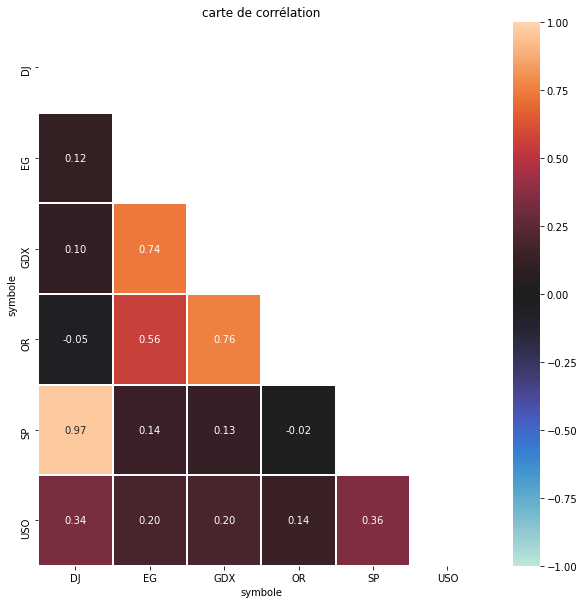

In [185]:
plot_heatmap(df_r)

on remarque qu'il ya une forte correlation positive entre l'indice Dow Jones et l'indice S&P 500(0.96)( entreprises americaines), ensuite une forte corrélation entre l'Eldorado Gold Corporation (EGO) et l'ETF Gold Miners, ensuite le Gold ETF et l'ETF Gold Miners(meme secteur economique).
l'indice de l'ETF pétrolier USO ne présente pas une corrélation avec les autres indices.

In [130]:
#rendement moyen
df_r.mean()* 100

symbole
DJ     0.042689
EG    -0.115971
GDX   -0.019014
OR    -0.008662
SP     0.053691
USO   -0.057760
dtype: float64

En moyenne l'indice Dow Jones a le plus grand rendement , vient celui de l'indice S&P 500.l'Eldorado Gold Corporation (EGO), l'ETF Gold Miners,le Gold ETF et l'indice de l'ETF pétrolier USO ont un rendement moyen negatif

In [133]:
#rendement annuel
n_days = 252
df_r.mean()* n_days * 100

symbole
DJ     10.757578
EG    -29.224613
GDX    -4.791471
OR     -2.182831
SP     13.530257
USO   -14.555406
dtype: float64

Le rendement annuel de l'indice S&P 500 est plus elévé(13.53) que celui du Dow Jones(10.75)

### Visualisons le prix de cloturre ajusté de l'or en fonction de toute les autres variables

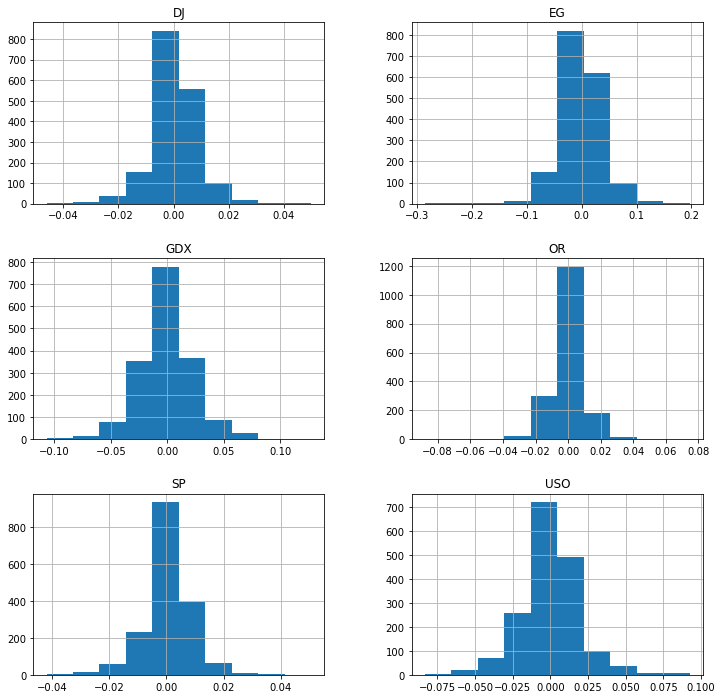

In [134]:
#histogrammes des rendements journaliers
df_r.hist(figsize=(12,12));

In [136]:
#statistiques sur les rendements
df_r.describe()

symbole           DJ           EG          GDX           OR           SP  \
count    1717.000000  1717.000000  1717.000000  1717.000000  1717.000000   
mean        0.000427    -0.001160    -0.000190    -0.000087     0.000537   
std         0.008154     0.037237     0.024521     0.009614     0.008265   
min        -0.046049    -0.285714    -0.106935    -0.087808    -0.041823   
25%        -0.003052    -0.021918    -0.013909    -0.004994    -0.003014   
50%         0.000516     0.000000    -0.000464     0.000000     0.000544   
75%         0.004655     0.019461     0.012941     0.004574     0.004918   
max         0.049846     0.196721     0.127517     0.074633     0.050525   

symbole          USO  
count    1717.000000  
mean       -0.000578  
std         0.019519  
min        -0.083154  
25%        -0.010676  
50%         0.000000  
75%         0.009988  
max         0.092404

l'ecart type de l'ETF pétrolier USO est le plus elévé(0.01) , ce qui vient confirmé qu'il est le plus volatile

### Modélisation

In [192]:
from sklearn.model_selection import train_test_split
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.linear_model import LinearRegression

In [162]:
data = data.drop("symbole", axis = 1)

In [163]:
data1 = data.copy()

In [181]:
data1

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24    9.490000    9.520000    9.280000    9.290000    9.290000   
2018-12-26    9.250000    9.920000    9.230000    9.900000    9.900000   
2018-12-27    9.590000    9.650000    9.370000    9.620000    9.620000   
2018-12-28    9.540000    9.650000    9.380000    9.530000    9.530000   
2018-12-31    9.630000    9.710000    9.440000    9.660000    9.660000   

              Volume  
Date                  
2011-12-15  21521900  
2011-12-16  18124300  
2011-12-19  12547200  
2011-12-20   9136300  
2011-12-21  11996100  
...              ...  
2018-12-24  21598200  
2018-12-26  40978800  
2018-12-27  36578700  
2018-12-28  22803400  
2018-12-31  28417400  

[10308 rows x 6 columns]

In [189]:
data1 = normalise(data1)
data1

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2011-12-15  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000
2011-12-16  0.997221  1.002711  1.014435  1.019038   1.019038  0.842133
2011-12-19  1.004782  1.005873  1.017467  1.016674   1.016674  0.582997
2011-12-20  1.013442  1.016005  1.032101  1.030526   1.030526  0.424512
2011-12-21  1.014476  1.016651  1.029135  1.031707   1.031707  0.557390
...              ...       ...       ...       ...        ...       ...
2018-12-24  0.061329  0.061439  0.061169  0.060986   0.060986  1.003545
2018-12-26  0.059778  0.064021  0.060840  0.064990   0.064990  1.904051
2018-12-27  0.061975  0.062278  0.061763  0.063152   0.063152  1.699604
2018-12-28  0.061652  0.062278  0.061828  0.062562   0.062562  1.059544
2018-12-31  0.062233  0.062665  0.062224  0.063415   0.063415  1.320395

[10308 rows x 6 columns]

In [193]:
#divisions du data
X = data1.drop(['Adj Close'], axis=1)
y = data1['Adj Close'] 

In [194]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = False)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8246, 5)
(2062, 5)
(8246,)
(2062,)


In [196]:
m_rf = LinearRegression()
model = m_rf.fit(X_train, y_train)

m_rf.predict(X_val)

array([-916500.64910779, -433865.90634642, -530189.25091455, ...,
        -24947.81339555, -882350.69399769,  -13706.70689454])

In [198]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [199]:
prediction

array([0.12969671, 0.1277519 , 0.12432487, ..., 0.04021378, 0.0438431 ,
       0.04297598])

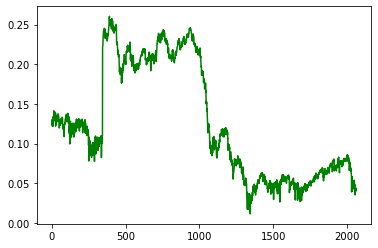

In [203]:
#prediction sous forme de graphique
plt.plot(prediction, color = "green");